<a href="https://colab.research.google.com/github/SridharAppusamy/Careevaluation/blob/main/Carevaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://contrib.scikit-learn.org/category_encoders/
#https://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial/notebook

# 1. random forest solve both classification and regression problems.
# 2. it uses large number of decision-trees to make predictions.
# 3. Random forests takes the average of all the predictions made by the decision-trees, which cancels out the biases. So, it does not suffer from the overfitting problem
# 4. handle the missing values - median values to replace continuous variables and second is to compute the proximity-weighted average of missing values
# 5. feature selection



import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

#models

from sklearn.model_selection import train_test_split
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from google.colab import drive
drive.mount('/content/drive')

import warnings

warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/August Preparation 2023/07-ML/car_evaluation.csv')
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
df['unacc'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: unacc, dtype: int64

In [ ]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [ ]:
X = df.drop(['class'], axis=1)

y = df['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,vhigh,vhigh,5more,2,med,low
48,vhigh,vhigh,3,more,med,med
468,high,vhigh,3,4,small,med
155,vhigh,high,3,more,med,low
1043,med,high,4,more,small,low


In [ ]:
# check data types in X_train
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [ ]:
!pip install category_encoders

In [ ]:
# import category encoders
import category_encoders as ce

In [ ]:
# encode categorical variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,1,1,1,1,1,1
48,1,1,2,2,1,2
468,2,1,2,3,2,2
155,1,2,2,2,1,1
1043,3,2,3,2,2,1


In [ ]:
# instantiate the classifier
rfc = RandomForestClassifier(random_state=0)
# fit the model
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
rfc.score(X_test,y_test)

0.9649122807017544

In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9649122807017544

In [ ]:
# view the feature scores
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

safety      0.291657
persons     0.235380
buying      0.160692
maint       0.134143
lug_boot    0.111595
doors       0.066533
dtype: float64

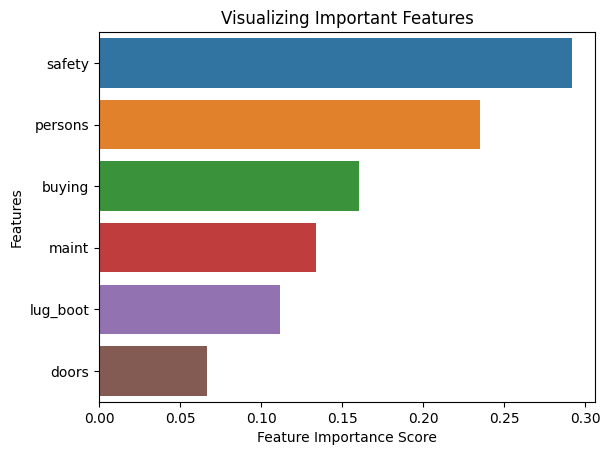

In [ ]:
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
# Add title to the graph
plt.title("Visualizing Important Features")
# Visualize the graph
plt.show()

In [ ]:
# declare feature vector and target variable
X = df.drop(['class', 'doors'], axis=1)
y = df['class']

In [ ]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
# encode categorical variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [ ]:
# instantiate the classifier with n_estimators = 100
clf = RandomForestClassifier(random_state=0)
# fit the model to the training set
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
clf.score(X_test,y_test)

0.9263157894736842

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[108,   5,  12,   2],
       [  1,  10,   2,   5],
       [ 10,   0, 389,   0],
       [  4,   1,   0,  21]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.88      0.85      0.86       127
        good       0.62      0.56      0.59        18
       unacc       0.97      0.97      0.97       399
       vgood       0.75      0.81      0.78        26

    accuracy                           0.93       570
   macro avg       0.80      0.80      0.80       570
weighted avg       0.93      0.93      0.93       570



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [5, 10, None],
    'max_features': ['auto', 'log2'],
    'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]
    }

In [ ]:
rfclassifier = RandomForestClassifier(random_state=0)
g_search = GridSearchCV(
    estimator = rfclassifier,
    param_grid = param_grid,
    cv = 3,
    n_jobs = 1,
    verbose = 0,
    return_train_score=True
    )

In [ ]:
g_search.fit(X_train, y_train)
print(g_search.best_params_)
print(g_search.score(X_test, y_test))

{'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 10}
0.9315789473684211


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 5 , stop = 15, num = 10)] # returns 10 numbers
max_features = ['auto', 'log2']
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)]
max_depth.append(None)
bootstrap = [True, False]

r_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'bootstrap': bootstrap
    }
print(r_grid)

{'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15], 'max_features': ['auto', 'log2'], 'max_depth': [5, 10, None], 'bootstrap': [True, False]}


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from category_encoders.utils import sklearn
rfr_random = RandomizedSearchCV(
    estimator=rfclassifier,
    param_distributions=r_grid,
    n_iter = 20,
    scoring=accuracy_score,
    cv = 3, verbose=2,
    random_state=42,
    n_jobs=-1,
    return_train_score=True
    )

rfr_random.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, None],
                                        'max_features': ['auto', 'log2'],
                                        'n_estimators': [5, 6, 7, 8, 9, 10, 11,
                                                         12, 13, 15]},
                   random_state=42, return_train_score=True,
                   scoring=<function accuracy_score at 0x7ac9b4515bd0>,
                   verbose=2)

In [ ]:
print(rfr_random.best_params_)

{'n_estimators': 9, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}


In [ ]:
# instantiate the classifier with n_estimators = 100
clf = RandomForestClassifier(rfr_random.best_params_)
# fit the model to the training set
clf.fit(X_train, y_train)

InvalidParameterError: ignored

In [ ]:
rfr_random.score(X_test , y_test)

TypeError: ignored